In [21]:
from skimage import io
import matplotlib.pyplot as plt
img=io.imread('datasets/brain_tumor_dataset/yes/Y1.jpg')

In [2]:
conda install pydicom

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - pydicom

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




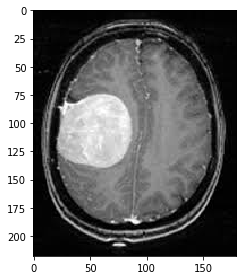

In [9]:
io.imshow(img)

In [26]:
import os
import seaborn as sns
import cv2
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.utils.np_utils import to_categorical


In [9]:
os.listdir('datasets/brain_tumor_dataset')

['no', 'yes']

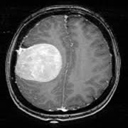

In [14]:
im=Image.open('datasets/brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
im

In [16]:
yes=os.listdir('datasets/brain_tumor_dataset/yes')
no=os.listdir('datasets/brain_tumor_dataset/no')


In [17]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [19]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)
len(data_target)==len(data)

True

In [20]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
yes_values=os.listdir('datasets/brain_tumor_dataset/yes')
no_values=os.listdir('datasets/brain_tumor_dataset/no')

In [36]:
X_data=[]
for file in yes_values:
    img=cv2.imread('datasets/brain_tumor_dataset/yes/'+file)
    face=cv2.resize(img,(32,32))
    (b,g,r)=cv2.split(face)
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [39]:
for file in no_values:
    img=cv2.imread('datasets/brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [42]:
X = np.squeeze(X_data)
X.shape

(253, 32, 32, 3)

In [43]:
# normalize data
X = X.astype('float32')
X /= 255

In [44]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])

In [45]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
____

In [46]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [47]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Train on 190 samples, validate on 63 samples
Epoch 1/150
190/190 [==============================] - 1s 7ms/sample - loss: 0.6771 - acc: 0.4789 - val_loss: 1.0583 - val_acc: 0.0000e+00
Epoch 2/150
190/190 [==============================] - 1s 4ms/sample - loss: 0.4617 - acc: 0.8158 - val_loss: 0.9656 - val_acc: 0.0000e+00
Epoch 3/150
190/190 [==============================] - 1s 4ms/sample - loss: 0.4721 - acc: 0.8158 - val_loss: 1.1662 - val_acc: 0.0000e+00
Epoch 4/150
190/190 [==============================] - 1s 5ms/sample - loss: 0.4662 - acc: 0.8158 - val_loss: 1.2535 - val_acc: 0.0000e+00
Epoch 5/150
190/190 [==============================] - 1s 6ms/sample - loss: 0.4661 - acc: 0.8158 - val_loss: 1.1492 - val_acc: 0.0000e+00
Epoch 6/150
190/190 [==============================] - 1s 6ms/sample - loss: 0.4539 - acc: 0.8158 - val_loss: 1.1447 - val_acc: 0.0000e+00
Epoch 7/150
190/190 [==============================] - 1s 4ms/sample - loss: 0.4612 - acc: 0.8158 - val_loss: 1.1237 - va

190/190 [==============================] - 1s 6ms/sample - loss: 0.0425 - acc: 0.9789 - val_loss: 2.0075 - val_acc: 0.6984
Epoch 121/150
190/190 [==============================] - 1s 5ms/sample - loss: 0.0477 - acc: 0.9895 - val_loss: 2.0134 - val_acc: 0.7143
Epoch 122/150
190/190 [==============================] - 1s 5ms/sample - loss: 0.0492 - acc: 0.9789 - val_loss: 2.3279 - val_acc: 0.6667
Epoch 123/150
190/190 [==============================] - 1s 5ms/sample - loss: 0.0513 - acc: 0.9737 - val_loss: 2.4275 - val_acc: 0.6032
Epoch 124/150
190/190 [==============================] - 1s 5ms/sample - loss: 0.0464 - acc: 0.9789 - val_loss: 2.5864 - val_acc: 0.5397
Epoch 125/150
190/190 [==============================] - 1s 5ms/sample - loss: 0.0478 - acc: 0.9789 - val_loss: 2.1076 - val_acc: 0.6984
Epoch 126/150
190/190 [==============================] - 1s 5ms/sample - loss: 0.0452 - acc: 0.9789 - val_loss: 1.8048 - val_acc: 0.7143
Epoch 127/150
190/190 [==============================] 

In [56]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.50793654


In [57]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

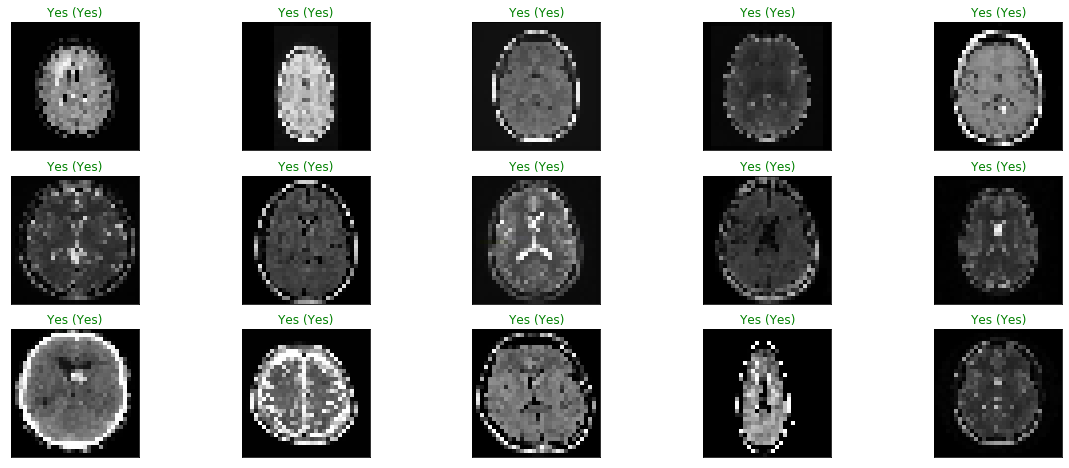

In [59]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()